<a href="https://colab.research.google.com/github/KamilBienias/data-science/blob/main/kursPawe%C5%82Krakowiak/ML-decision-trees-and-random-forests/random_forest/01_iris_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* @author: krakowiakpawel9@gmail.com  
* @site: e-smartdata.org

In [ ]:
print("#############################################")
print("Etap9. Odcinek3: Model lasu losowego - Iris dataset")

from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

#############################################
Etap9. Odcinek3: Model lasu losowego - Iris dataset


In [ ]:
iris = load_iris()
data = iris.data
targets = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

In [ ]:
all_data = np.c_[data, targets]
print(all_data[:5])

[[5.1 3.5 1.4 0.2 0. ]
 [4.9 3.  1.4 0.2 0. ]
 [4.7 3.2 1.3 0.2 0. ]
 [4.6 3.1 1.5 0.2 0. ]
 [5.  3.6 1.4 0.2 0. ]]


In [ ]:
df = pd.DataFrame(all_data, columns=feature_names + ['target'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [ ]:
# bierze kolumny petal bo one były najbardziej skorelowane z target
data = data[:, [2, 3]]
print(data[:5])

[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, targets)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (112, 2)
X_test shape: (38, 2)
y_train shape: (112,)
y_test shape: (38,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
clf.score(X_test, y_test)

1.0

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


Text(0, 0.5, 'petal width (cm)')

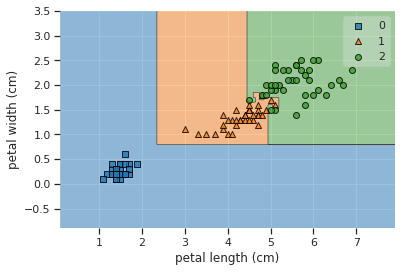

In [ ]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X_train, y_train, clf)
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[3])

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


Text(0, 0.5, 'petal width (cm)')

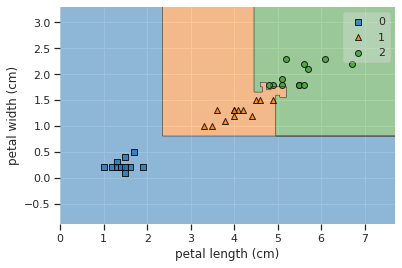

In [ ]:
plot_decision_regions(X_test, y_test, clf)
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[3])

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_estimators': np.arange(1, 100)}]

gs = GridSearchCV(clf, param_grid=param_grid, scoring='accuracy', n_jobs=-1)
gs.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=Non...
             param_grid=[{'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16

In [ ]:
gs.best_params_

{'n_estimators': 19}

In [ ]:
gs.best_score_

0.9561264822134387

In [ ]:
model = gs.best_estimator_

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


Text(0, 0.5, 'petal width (cm)')

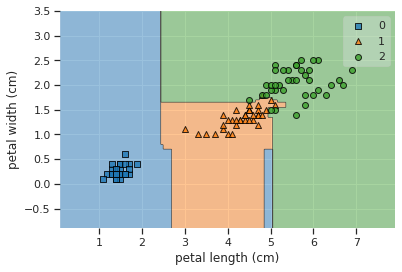

In [ ]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X_train, y_train, model)
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[3])

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


Text(0, 0.5, 'petal width (cm)')

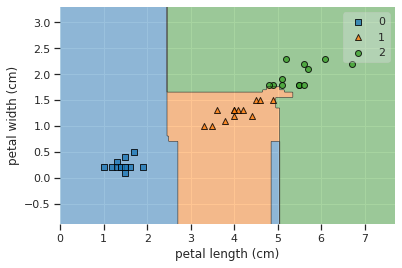

In [ ]:
plot_decision_regions(X_test, y_test, model)
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[3])

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)
print(acc)

1.0


In [ ]:
# odtąd już poza kursem
model.feature_importances_

array([0.49790646, 0.50209354])

In [ ]:
# czytałem o atrybucie feature_importances_ na
# https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
# i tam było odwracanie listy
lista = [5,6,7,8,9]
odwrotna = lista[::-1]
print(odwrotna)

[9, 8, 7, 6, 5]


### All features

In [ ]:
data = iris.data
targets = iris.target

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, targets)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (112, 4)
X_test shape: (38, 4)
y_train shape: (112,)
y_test shape: (38,)


In [ ]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_estimators': np.arange(1, 100)}]

gs = GridSearchCV(clf, param_grid=param_grid, scoring='accuracy', n_jobs=-1)
gs.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=No...
             param_grid=[{'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16

In [ ]:
model = gs.best_estimator_

y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)

0.9473684210526315

In [ ]:
# ważność cech, czyli dwie ostatnie petal są najważniejsze
model.feature_importances_

array([0.1075663 , 0.01674335, 0.3181675 , 0.55752285])

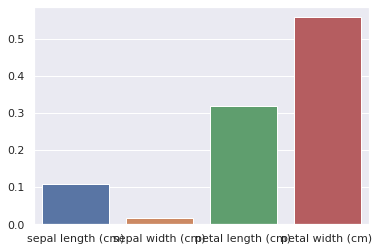

In [ ]:
sns.barplot(x=feature_names, y=model.feature_importances_)